In [5]:
import numpy as np 
import matplotlib.pyplot as plt 

### Question 1 ###

$\alpha$ représente le facteur de reproduction des proies

$\beta$ représente le facteur de mortalité des proies du fait des prédateurs (plus $\beta$ est élevé, plus la décroissance de $x_1$ sera élevée)

$\delta$ représente le facteur de reproduction des prédateurs du fait de la présence des proies

$\gamma$ représente le facteur de mortalité des proies

Le système différentielle se réécrit : 
$\dot{X} = f (X) $ avec $f : (x_1,x_2) \in (\mathbb{R^{*}_{+}})^2 \mapsto (x_1(\alpha - \beta x_2),-x2(\gamma - \delta x_1))$

Les points d'équilibre vérifie $f(x_1,x_2) = 0$:

Donc l'ensemble des points d'équilibre est $ EQ = \{(0,0),(\frac{\gamma}{\delta},\frac{\alpha}{\beta})\}$

Déterminons les valeurs propres du jacobien de $f$ en $\bar{x}$,
on a: $J_f(\bar{x}) = \begin{pmatrix} 0 & \frac{\delta \alpha}{\beta} \\ -\frac {\beta \gamma} {\delta} & 0 \end{pmatrix} $

Les valeurs propres ont donc des partie réelles nulles, on ne peut pas conclure sur la stabilité en $\bar{x}$

Déterminons les valeurs propres du jacobien de $f$ en $(0,0)$,
on a: $J_f(0,0) = \begin{pmatrix} \alpha & 0 \\ 0 & -\gamma\end{pmatrix}$ donc $\alpha>0$ est valeur propre donc $(0,0)$ est instable

### Question 2 ###

In [9]:


alpha = 0.2
beta=0.4
gamma=0.3
delta= 0.1

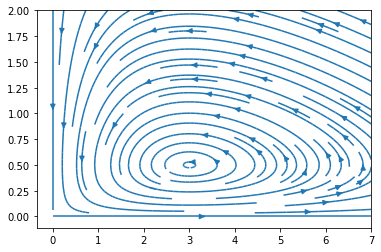

In [7]:

def f(x1,x2):
    return (x1*(alpha-beta*x2),-x2*(gamma-delta*x1))


x1 = np.linspace(0,7,10)
x2 = np.linspace(0,2,50)
X1,X2 = np.meshgrid(x1,x2)

plt.show()

plt.streamplot(X1,X2,f(X1,X2)[0],f(X1,X2)[1]);


D'après le champ de vecteurs ci-dessus, on peut voir que $(0,0)$ est un point d'équilibre instable tandis que l'autre point d'équilibre est bien stable, mais ne semble pas localement asymptotiquement stable.

### Question 3 ###



La fonction f est de classe $C^{1}$ donc d'après le théorème de Cauchy, il existe une unique solution maximale.

si $x_1(0) = 0 $, alors avec $x_1 : t \in \mathbb{R^{+}} \mapsto 0 $ et $x_2 : t \in \mathbb{R^{+}} \mapsto x_20\exp(-\gamma t) $

Alors $X(t) = \begin{pmatrix}  x_1(t) \\ x_2(t) \end{pmatrix}$ est la solution maximale associé à la condition initiale $(0,(0,x_{20}))$

de même si $x_{20} = 0$,

Si $x_{10} > 0$ et $x_{20} > 0$ : 

avec $X$ une solution maximale associée à $(0,(x_{10},x_{20})$, si il existe $t_0 >0$ tel que $x_1(t_0)=0$ alors on a :

$y_1 : t \in \mathbb{R^{+}} \mapsto 0 $ et $y_2 : t \in \mathbb{R^{+}} \mapsto x_2(t_0)\exp(-\gamma (t-t_0)) $ correspond aussi à une solution maximale (définie sur $\mathbb{R^{+}}$ au système de Cauchy avec les conditions $(t_0,(0,x_2(t_0))$ (tout comme $X$)

donc par unicité $x_1(0)=y_1(0)=x_{10}=0$ ce qui est absurde.

On raisonne de même si il existe $t_1 > 0 $ tel que $x_2(t_1) = 0$

donc si $x_{10} > 0$ et $x_{20} > 0$ alors la solution maximale associée $X$ est à valeurs dans $\mathbb{R_{>0}}\times \mathbb{R_{>0}} $ 

En considérant $X$ solution:

On pose $V = H \ o\  X $

$V$ est bien dérivable car H est de classe $C^{1}$ sur son domaine de définition.

On se place dans le cas où $X$ est bien à valeurs dans $(\mathbb{R}_{+}^{*})^{2}$

$ V'(t) = \delta x_1(\alpha - \beta x_2) - \gamma(\alpha - \beta x_2)- \beta x_2 (\gamma - \delta x_1) + \alpha (\gamma - \delta x_1)  $

$V'(t) = (\alpha - \beta x_2)(\delta x_1 - \gamma) + (\gamma - \delta x_1)(\alpha - \beta x_2)$

$V'(t) = 0 $

Donc d'après l'étude sur $H$, $H$ est constante le long de la solution maximale $X$ associée à $(x_{10},x_{20}) \in (\mathbb{R^{*}_{+}})^2 $, donc d'après la forme de $H$, nécessairement $X$ est bornée. D'où, d'après le théorème sur le domaine d'existence de la solution maximale, $X$ est définie sur $\mathbb{R_{>0}}$   ($f$ est définie sur $\mathbb{R}^{2}$)

### Question 5 ###

In [19]:
def H(x1,x2) : 
    return delta*x1+ (-gamma)*np.log(x1) + beta*x2 - alpha * np.log(x2)

On pose:  $ V : (x_1,x_2) \in (\mathbb{R}_{+})^{2} \mapsto H(x_1,x_2) - H(\frac{\gamma}{\delta},\frac{\alpha}{\beta}) $

$V$ est bien continûment différentiable et f est continue.

De plus, $ \frac{\mathrm{d} }{\mathrm{d} t} V(X(t)) \leq 0 $

De plus, $V(x_1,x_2)\geq 0 $ et $V(x_1,x_2) = 0 \Leftrightarrow (x_1,x_2) = (\frac{\gamma}{\delta},\frac{\alpha}{\beta}) $ 

Donc le point d'équilibre $(\frac{\gamma}{\delta},\frac{\alpha}{\beta})$ est stable d'après le théorème de Lyapunov.

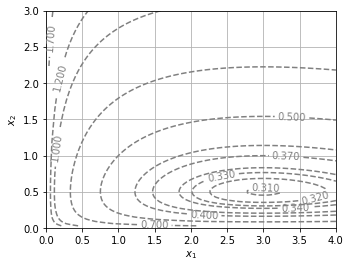

In [46]:
from IPython.display import display
import numpy as np
import matplotlib.pyplot as plt

def display_contour(f, x, y, levels):
    X, Y = np.meshgrid(x, y)
    Z = f(X, Y)
    fig, ax = plt.subplots()
    contour_set = plt.contour(
        X, Y, Z, colors="grey", linestyles="dashed", 
        levels=levels 
    )
    ax.clabel(contour_set)
    plt.grid(True)
    plt.xlabel("$x_1$") 
    plt.ylabel("$x_2$")
    plt.gca().set_aspect("equal")

display_contour(H,
    x=np.linspace(0, 4.0, 100), 
    y=np.linspace(0.0, 3.0, 100), 
    levels= [0.31,0.32, 0.33,0.34,0.37,0.4,0.5,0.7,1,1.2,1.7] # 10 levels, automatically selected
)

Comme $H o X$ est constante, $X$ suit donc une courbe de niveau, cela confirme l'intuition grâce au champ de vecteurs, $X$ "tourne" autour du point d'équilibre stable.

### Question 10 ###

On dérive : $ \frac{d }{dt} (H(x(t)) - H_0) = (- \delta u_1 + \gamma \frac{u_1}{x_1} -\beta u_2 + \alpha \frac{u_2}{x_2} )( H(x(t)) - H_0) $ 

Donc $ \frac{d }{dt} (H(x(t)) - H_0) = (u_1(\frac{\gamma}{x_1} - \delta) + u_2 (\frac{\alpha}{x_2} - \beta ))(H(x(t)) - H_0)$

En remarquant que $\|\nabla{H(x(t))}\| ^{2} = (\frac{\gamma}{x_1} - \delta)^2 + (\frac{\alpha}{x_2} - \beta )^2$

et en posant $u_1 = - k (\frac{\gamma}{x_1} - \delta)$ et $u_2 = - k(\frac{\alpha}{x_2} - \beta)$

On obtient le résultat.

Or comme $x$ reste à une distance strictement positive de  $\overline{x}$ et que $x$ la trajectoire de $x$ reste à une distance strcitement positive $d$ de $(0,0)$, il existe $m  > 0 $ et $M > 0$ tel que:

 $ 0 < m < \|\nabla{H(x(t))}\| ^{2} < M $ 

 Donc $  -k m  ( H(x(t)) - H_0  ) < \frac{d }{dt} (H(x(t)) - H_0) <-k M  ( H(x(t)) - H_0  )$

 Par intégration et croissance de l'intégrale :

 $\exp(-kmt)< H(x(t)) - H_0 < \exp(-kMt)$

 Donc $H(x)$ converge exponentiellement vers $H_0$